## Youtube Videos Analysis

### Importing necessary libraries 

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import datetime
from wordcloud import WordCloud, STOPWORDS

### Reading the dateset for analysis

In [87]:
os.chdir(r'C:\Users\ash65\Desktop')
youtube = pd.read_csv('USvideos.csv')

### Displaying the top 5 rows from the dataset

In [88]:
youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### Seeing if there are any null values

In [89]:
total_null = youtube.isnull().sum().sort_values(ascending=False) #to check the presence of null values
total_null

description               570
video_error_or_removed      0
ratings_disabled            0
comments_disabled           0
thumbnail_link              0
comment_count               0
dislikes                    0
likes                       0
views                       0
tags                        0
publish_time                0
category_id                 0
channel_title               0
title                       0
trending_date               0
video_id                    0
dtype: int64

Here we can observe that there are null values in the description column. Rest of the columns have no null values

### Analyzing the dataset before we can start the EDA

In [90]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

We can see that the date column is of the data type 'object' which is wrong since it is supposed to be in 'datetime' type.

### Missing value imputation

In [91]:
youtube["description"] = youtube["description"].fillna(value="")

In [92]:
#checking if the missing values have been handled
total_null = youtube.isnull().sum().sort_values(ascending=False) #to check the presence of null values
total_null

description               0
video_error_or_removed    0
ratings_disabled          0
comments_disabled         0
thumbnail_link            0
comment_count             0
dislikes                  0
likes                     0
views                     0
tags                      0
publish_time              0
category_id               0
channel_title             0
title                     0
trending_date             0
video_id                  0
dtype: int64

#### Now , let us convert the date variables 'trending_date' and 'publish_time' to a datetime format

In [93]:
youtube['trending_date'] = pd.to_datetime(youtube['trending_date'],format = '%y.%d.%m')
youtube['publish_time'] = pd.to_datetime(youtube['publish_time'], 
                                         format = '%Y-%m-%dT%H:%M:%S')

In [94]:
# checking if the date columns have been converted appropriately
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40949 non-null  object             
 1   trending_date           40949 non-null  datetime64[ns]     
 2   title                   40949 non-null  object             
 3   channel_title           40949 non-null  object             
 4   category_id             40949 non-null  int64              
 5   publish_time            40949 non-null  datetime64[ns, UTC]
 6   tags                    40949 non-null  object             
 7   views                   40949 non-null  int64              
 8   likes                   40949 non-null  int64              
 9   dislikes                40949 non-null  int64              
 10  comment_count           40949 non-null  int64              
 11  thumbnail_link          40949 non-null  o

#### Checking if there are any duplicate rows in the dataset

In [95]:
duplicate = youtube[youtube.duplicated()]
len(duplicate)

48

Here we can see that there are 48 duplicate rows. We would be removing the duplicate rows since that would interfer with our analysis since there were would double instances of some individual reconds. To make sure our analysis goes in the right track , and to prevent any further inaccuracies , we would be removing these rows from our dataset !

In [96]:
youtube.drop_duplicates(inplace = True)

In [97]:
# checking if the duplicate values are removed
duplicate = youtube[youtube.duplicated()]
len(duplicate)

0

The duplicate rows are removed too.

#### Interesting thing noticed

In [98]:
dup_date_video = youtube[youtube.duplicated(['video_id','trending_date'])]
group_issue = pd.merge(dup_date_video[['video_id','trending_date']], youtube, 
                       how = 'inner', 
                       on = ['video_id','trending_date']) 
group_issue

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,YI3tsmFsrOg,2018-05-15,The Deadliest Being on Planet Earth – The Bact...,Kurzgesagt – In a Nutshell,27,2018-05-13 12:00:22+00:00,"bacteriophage|""phage""|""endolysin""|""phage thera...",3445885,197843,1654,18721,https://i.ytimg.com/vi/YI3tsmFsrOg/default.jpg,False,False,False,"A war has been raging for billions of years, k..."
1,YI3tsmFsrOg,2018-05-15,The Deadliest Being on Planet Earth – The Bact...,Kurzgesagt – In a Nutshell,27,2018-05-13 12:00:22+00:00,"bacteriophage|""phage""|""endolysin""|""phage thera...",3445885,197847,1654,18721,https://i.ytimg.com/vi/YI3tsmFsrOg/default.jpg,False,False,False,"A war has been raging for billions of years, k..."
2,vY_5EvoL1Is,2018-05-15,NEW AMSTERDAM | Official Trailer | NBC Fall Sh...,New Amsterdam,24,2018-05-13 16:29:57+00:00,"New Amsterdam|""NBC""|""2018""|""New Show""|""trailer...",2469801,5084,1719,567,https://i.ytimg.com/vi/vY_5EvoL1Is/default.jpg,False,False,False,Break the rules. Heal the system. The Blacklis...
3,vY_5EvoL1Is,2018-05-15,NEW AMSTERDAM | Official Trailer | NBC Fall Sh...,New Amsterdam,24,2018-05-13 16:29:57+00:00,"New Amsterdam|""NBC""|""2018""|""New Show""|""trailer...",2471590,5085,1719,567,https://i.ytimg.com/vi/vY_5EvoL1Is/default.jpg,False,False,False,Break the rules. Heal the system. The Blacklis...


We can notice interesting instances where the same record has been published 2 times on the same day. Now , if you are wondering why it didn't get detected while we were detecting the duplicates , it is because the number of likes are different of the videos (meaning one video has been posted 2 times and they both have different number of likes)

To handle this , we would be removing the rows with the minimum number of likes..

In [99]:
to_remove = group_issue.groupby(['video_id','trending_date']).min()['likes'] #taking only those rows with the smaller number of likes
joined_df = pd.merge(youtube, to_remove, 
                     on= ['video_id','trending_date','likes'], 
                     how = 'outer',
                     indicator = True)
youtube = joined_df[joined_df['_merge'] == 'left_only'].drop('_merge',axis=1)

#### Now that this is done , we are good to go with the EDA !

In [16]:
youtube.describe()

,category_id,views,likes,dislikes,comment_count
count,40899.000000,4.089900e+04,4.089900e+04,4.089900e+04,4.089900e+04
mean,19.970317,2.360649e+06,7.427040e+04,3.711821e+03,8.448509e+03
std,7.569441,7.397898e+06,2.290045e+05,2.904695e+04,3.745225e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419695e+05,5.416500e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.809770e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821337e+06,5.533200e+04,1.936000e+03,5.751500e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


## EDA

#### Column : Comments disabled

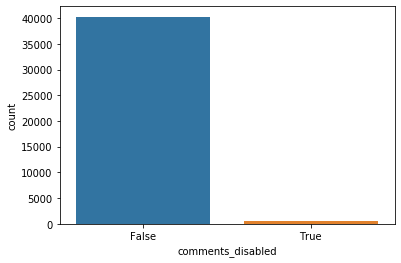

In [245]:
ax = sns.countplot(x="comments_disabled", data=youtube)

Here we can see that since the count of the 'False' is much higher than the 'True' count, the comments are not disabled for most of the videos uploaded

#### Which video title have the highest views ?

In [44]:
#grouping by title and storing the columns title and views in a new variable
max_views_per_video = youtube[['title','views']].groupby(['title'], as_index = False).max()
#sorting the views in decreasing order
w= max_views_per_video.sort_values(by='views',ascending =False)

<BarContainer object of 5 artists>

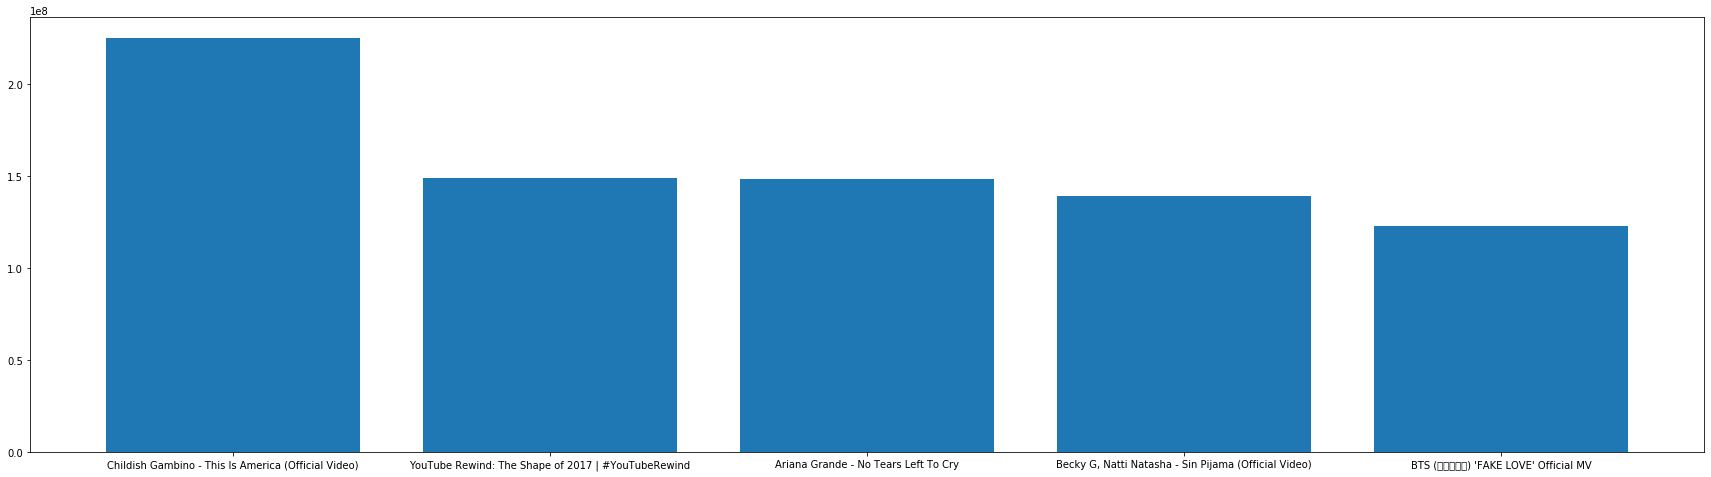

In [61]:
#storing the top 5 records
g = w.head()
fig_q1 = plt.figure(1,[30,8])
plt.bar(g['title'],g['views']) #plotting a bar plot

Here we can see that the video 'Childish Gambino: This Is America (Live) - SNL' has the highest number of views.

#### Which videos was on trending for a long time ?

In [187]:
#grouping the videos on channel title and taking the respective values in each group
video_stat = youtube.groupby('channel_title').agg({'channel_title':'count',
    'trending_date': ['nunique','min','max'], #splitting the trending date into 3 columns, one gives the count, other gives the startdate and third gives the end date
                           'likes': 'max', #considering the max value of likes in each group
                           'dislikes': 'max', #considering  the max value of dislikes in each group
                           'comment_count': 'max'}) #considering  the max value of comments in each group

video_stat.columns = ['trending_count','days_trend', 'first_trend_date','last_trend_date','likes','dislikes',
                      'comments'] #renaming columns names
video_stat.reset_index(inplace=True)
video_stat.head()

,channel_title,trending_count,days_trend,first_trend_date,last_trend_date,likes,dislikes,comments
0,12 News,2,2,2017-11-15,2017-11-16,182,45,0
1,1MILLION Dance Studio,33,33,2018-02-25,2018-04-25,69778,857,8283
2,1theK (원더케이),19,19,2017-11-19,2018-01-25,357641,8055,22794
3,20th Century Fox,134,134,2017-11-14,2018-06-12,429341,7412,28740
4,2CELLOS,2,2,2017-11-14,2017-11-15,11702,125,471


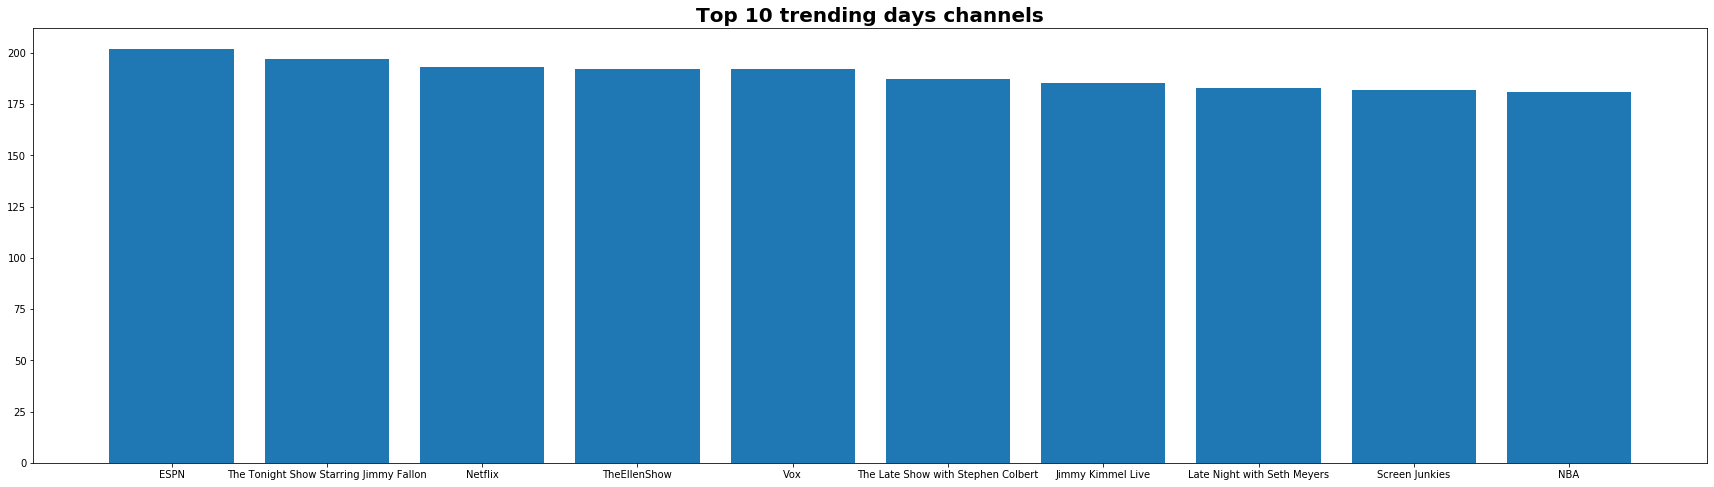

In [230]:
w= video_stat.sort_values(by='trending_count',ascending =False) #sorting by trending count
w = w.head(10) #just considering top 10 rows
fig_q1 = plt.figure(1,[30,8])
plt.bar(w['channel_title'],w['trending_count']) #plotting bar plot
plt.title('Top 10 trending days channels', fontweight="bold",size=20) #plot title
plt.show()

We can see here that ESPN channel was on trending for the most time as compared to other channels

 #### Which channels have the highest total views?

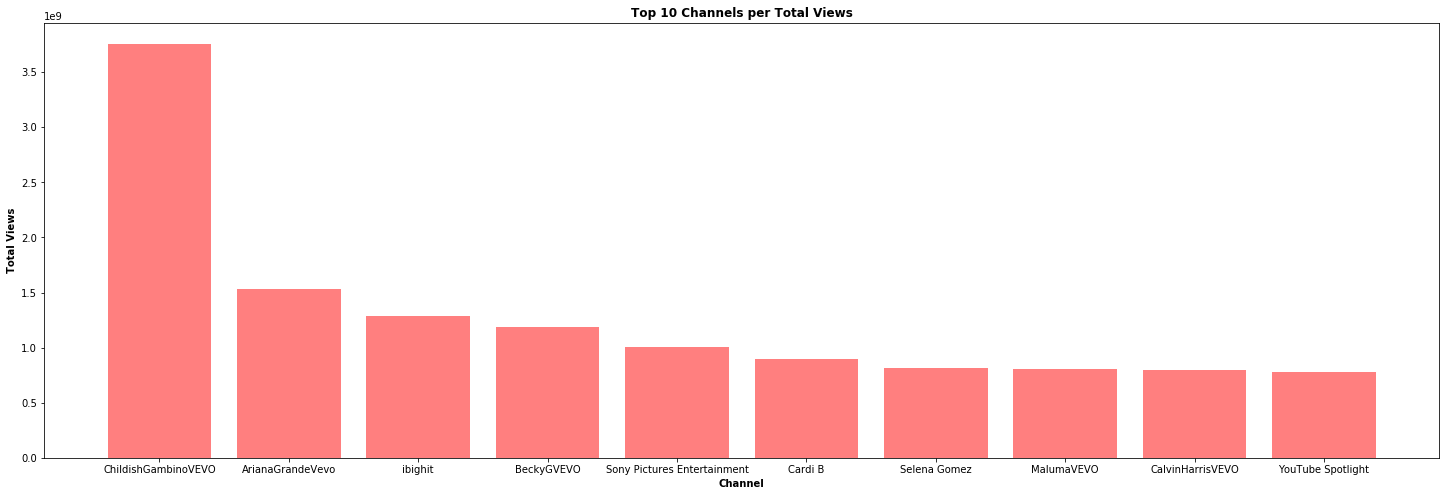

In [234]:
#grouping by video_id and channel_id. The 'views' columns will get summed in each group
max_view_video = youtube[['video_id','channel_title','views']].groupby(
                        ['video_id','channel_title'], as_index = False).sum().nlargest(10, columns = 'views')
#grouping by channel_title column and the views is summed up and sorted
q4_df = max_view_video[['views','channel_title']].groupby('channel_title', as_index = False).sum().sort_values(by = 'views', ascending = False)
fig_q4 = plt.figure(1,[25,8])
plt.bar(q4_df['channel_title'], q4_df['views'],alpha=0.5, color = 'r')
plt.title('Top 10 Channels per Total Views', fontweight="bold")
plt.xlabel('Channel', fontweight="bold")
plt.ylabel('Total Views', fontweight="bold")
plt.show()

The Channel 'ChildishGambinoVEVO' has the highest number of views 

#### Top 5 video titles with most number of dislikes

Text(0.5, 1.0, 'Top 5 video title with most number of dislikes')

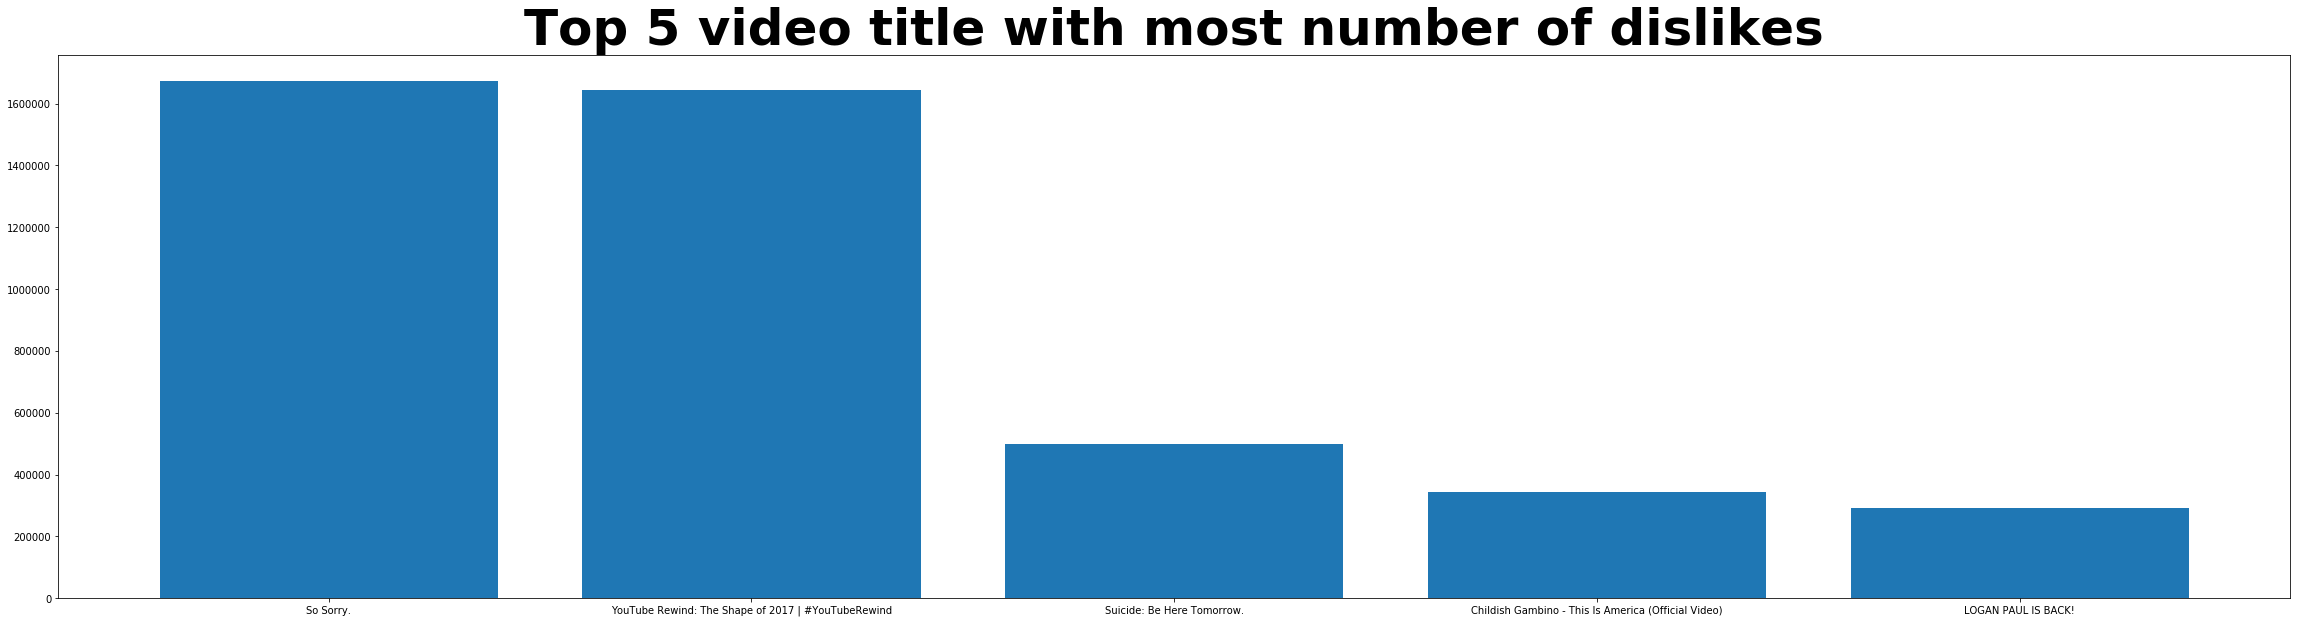

In [215]:
g = youtube.sort_values('dislikes', ascending=False).head(40)[['title','dislikes']]
fig_q1 = plt.figure(1,[40,10])
plt.bar(g['title'],g['dislikes']) #plotting a bar plot
plt.title('Top 5 video titles with most number of dislikes', fontweight="bold",size=50)

#### Top 10 Channels having highest trending videos

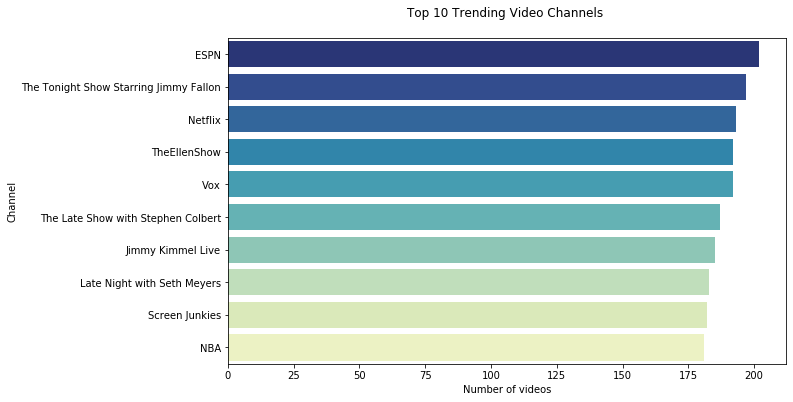

In [236]:
# Top 10 Channels having highest trending videos
#grouping by category_title and storing it's count in 'no_of_videos' and sorting it.
videos_by_channel = youtube.groupby("channel_title").size().reset_index(name="no_of_videos") \
    .sort_values("no_of_videos", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10,6))
vbc_plot = sns.barplot(x="no_of_videos", y="channel_title", data=videos_by_channel, palette="YlGnBu_r")
vbc_plot = ax.set(xlabel="Number of videos", ylabel="Channel")
plt.title("Top 10 Trending Video Channels \n")
plt.show()

#### Top 10 Categories having highest trending videos

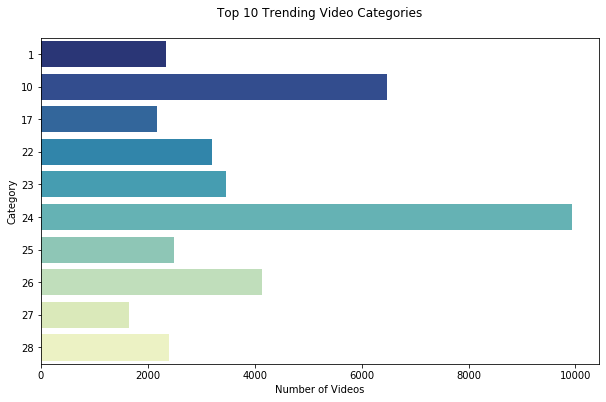

In [101]:
# Top 10 Categories having highest trending videos
# category names are not available in dataset 
#grouping by category_id and storing it's count in 'no_of_videos' and sorting it.
videos_by_category = youtube.groupby("category_id").size().reset_index(name="no_of_videos") \
    .sort_values("no_of_videos", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10,6))
vbcat_plot = sns.barplot(x="no_of_videos", y="category_id", data=videos_by_category, palette="YlGnBu_r", orient = 'h')
vbcat_plot = ax.set(xlabel="Number of Videos", ylabel="Category")
plt.title("Top 10 Trending Video Categories\n")
plt.show()

#### Wordcount to find which words are frequently used in titles

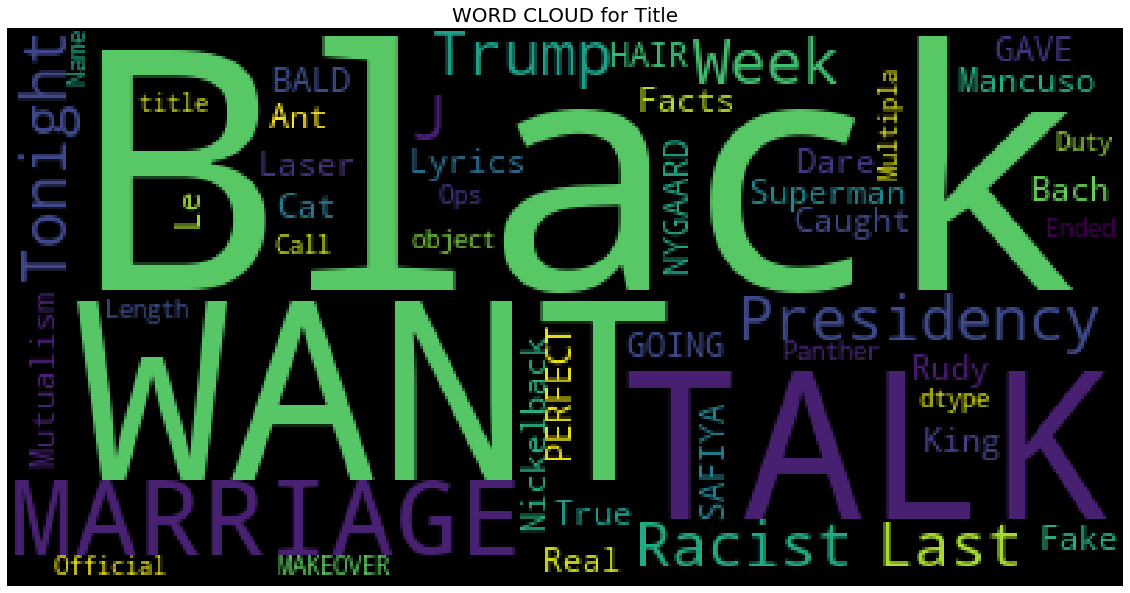

In [226]:
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black',stopwords = stopwords,max_words = 1000,max_font_size = 120,random_state = 42).generate(str(youtube['title']))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for Title', fontsize = 20)
plt.axis('off')
plt.show()